# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

## Loading data

In [2]:
# directly parse date columns when loading
client_df = pd.read_csv("data/client_data.csv", parse_dates=["date_activ", "date_end", "date_modif_prod", "date_renewal"])
price_df = pd.read_csv("data/price_data.csv", parse_dates=["price_date"])

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


## Descriptive statistics
### Data types

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

- Dataframe seems to have no missing values at first glance

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


- For each id, we have price data for multiple dates

### Statistics

In [7]:
client_df.describe().round(2)

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,14606.00,14606.00,14606.00,14606,14606,14606,14606,14606.00,14606.00,14606.00,...,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.0
mean,159220.29,28092.38,16090.27,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.61,1399.76,0.97,...,0.05,43.13,152.79,24.57,24.56,1.29,189.26,5.00,18.14,0.1
min,0.00,0.00,0.00,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,3.30,0.0
25%,5674.75,0.00,0.00,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,495.00,0.00,0.00,...,0.00,40.61,0.00,14.28,14.28,1.00,50.71,4.00,12.50,0.0
50%,14115.50,0.00,792.50,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.88,314.00,0.00,...,0.08,44.31,37.39,21.64,21.64,1.00,112.53,5.00,13.86,0.0
75%,40763.75,0.00,3383.00,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.79,1745.75,0.00,...,0.10,44.31,193.98,29.88,29.88,1.00,243.10,6.00,19.17,0.0
max,6207104.00,4154590.00,771203.00,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.83,175375.00,30.00,...,0.20,59.27,15042.79,374.64,374.64,32.00,24570.65,13.00,320.00,1.0
std,573465.26,162973.06,64364.20,NaN,NaN,NaN,NaN,2387.57,3247.79,5.11,...,0.05,4.49,341.37,20.23,20.23,0.71,311.80,1.61,13.53,0.3


In [8]:
price_df.describe().round(2)

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002.00,193002.00,193002.00,193002.00,193002.00,193002.00
mean,2015-06-16 12:50:49.933161216,0.14,0.05,0.03,43.33,10.62,6.41
min,2015-01-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2015-04-01 00:00:00,0.13,0.00,0.00,40.73,0.00,0.00
50%,2015-07-01 00:00:00,0.15,0.09,0.00,44.27,0.00,0.00
75%,2015-10-01 00:00:00,0.15,0.10,0.07,44.44,24.34,16.23
max,2015-12-01 00:00:00,0.28,0.23,0.11,59.44,36.49,17.46
std,NaN,0.03,0.05,0.04,5.41,12.84,7.77


- Prices for every month in 2015
- Many prices seem to be 0
- Other than that, the values seem reasonable e.g., no negative values, fix price higher than var price

## Data Visualization util functions

In [9]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=11)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),2))
        # If value is 0 do not annotate
        if value == "0.0":
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style="plain", axis="x")

def plot_categorical(dataframe, column, normalize=False, **kwargs):
    """
    Plots distribution of categorical variable 'column' differentiated according to churn or no churn. 
    If normalize=True, relative frequencies are used.
    """
    df_plot = dataframe[[column, "churn"]].groupby([column, "churn"]).size().unstack(fill_value=0)
    df_plot["total"] = df_plot.sum(axis=1)
    df_plot = df_plot.sort_values("total", ascending=False)
    if normalize:
        df_plot[[0, 1]] = df_plot[[0, 1]].div(df_plot["total"], axis=0).round(4)
    ax = df_plot[[0, 1]].plot(kind="bar", stacked=True, **kwargs)
    ax.bar_label(ax.containers[0], label_type="center", fontsize=8)
    ax.bar_label(ax.containers[1], label_type="center", fontsize=8)

## Client Characteristics

### Churn

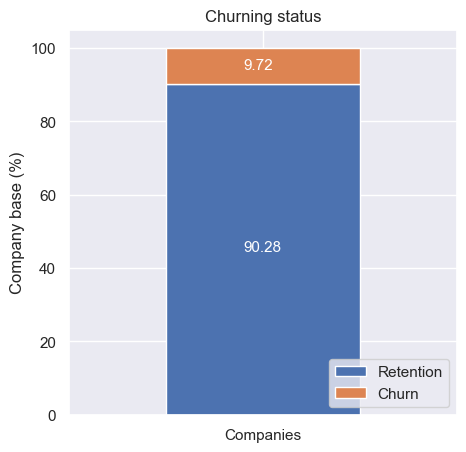

In [10]:
churn = client_df[["id", "churn"]]
churn.columns = ["Companies", "churn"]
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

- Dataset is imbalanced, consider this for evaluation metrics

### Client ID

In [11]:
print(f"num of unique clients in client_df: {client_df['id'].nunique()}")
print(f"num of unique clients in price_df: {price_df['id'].nunique()}")
print(f"num of unique clients in client_df and price_df: {pd.merge(client_df, price_df)['id'].nunique()}")

num of unique clients in client_df: 14606
num of unique clients in price_df: 16096
num of unique clients in client_df and price_df: 14606


- We have price data for all clients in client_df
- No duplicates

### Sales Channel

In [12]:
print(client_df["channel_sales"].value_counts())
missing_pct = client_df["channel_sales"].value_counts()["MISSING"] / client_df["channel_sales"].value_counts().sum()
print(f"\n{missing_pct:.4f} % of items are missing")

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

0.2550 % of items are missing


- Some values are missing, may not be useful as independent variable

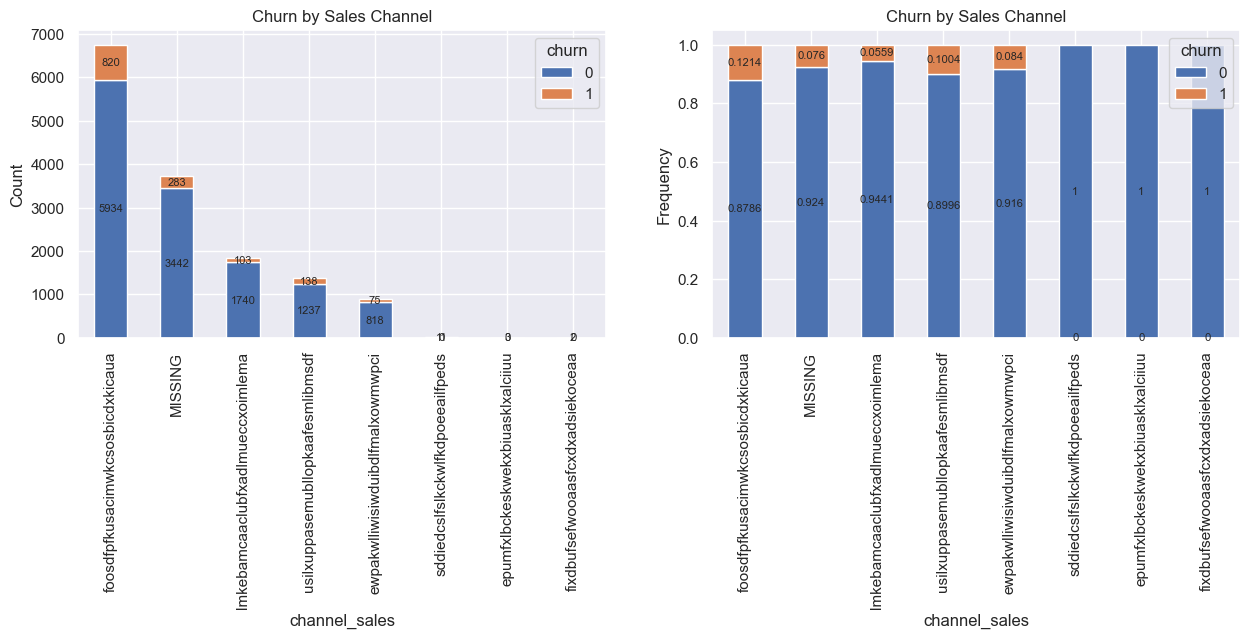

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(4)
plot_categorical(client_df, "channel_sales", ax=axes[0], title="Churn by Sales Channel", ylabel="Count")
plot_categorical(client_df, "channel_sales", normalize=True, ax=axes[1], title="Churn by Sales Channel", ylabel="Frequency")

- Potential relation between sales channel and churn

### Gas Clients

In [14]:
print(client_df["has_gas"].value_counts())

has_gas
f    11955
t     2651
Name: count, dtype: int64


In [15]:
# clients which have consumed gas but are not gas clients according to the data
print(client_df[client_df["cons_gas_12m"] > 0]["has_gas"].value_counts())

has_gas
t    2559
f      53
Name: count, dtype: int64


- Negligible error in data, could also have other reasons

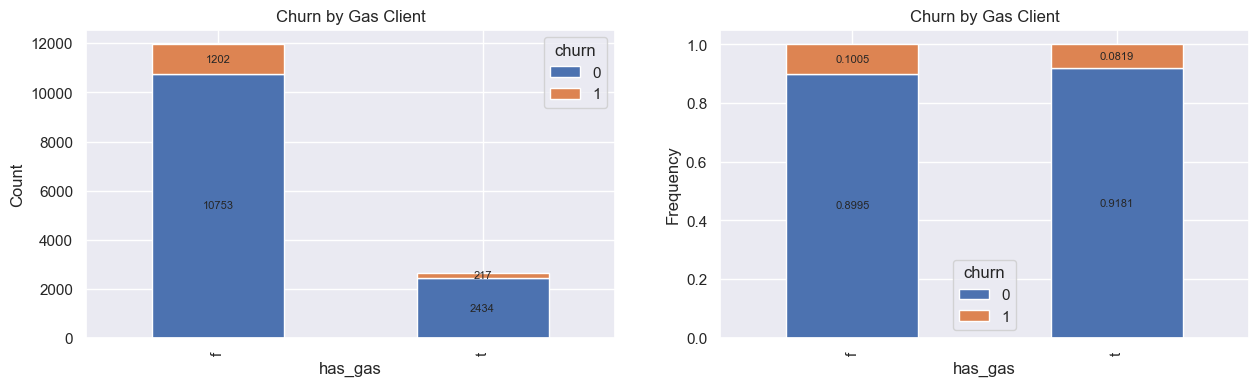

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(4)
plot_categorical(client_df, "has_gas", ax=axes[0], title="Churn by Gas Client", ylabel="Count")
plot_categorical(client_df, "has_gas", normalize=True, ax=axes[1], title="Churn by Gas Client", ylabel="Frequency")

- Clients who also buy gas appear to be less likely to churn
- Makes intuitive sense, since switching suppliers may be more complicated.

### Electricity Campaign

In [17]:
print(client_df["origin_up"].value_counts())

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64


- Neglible amount of missing values, corresponding rows could be dropped

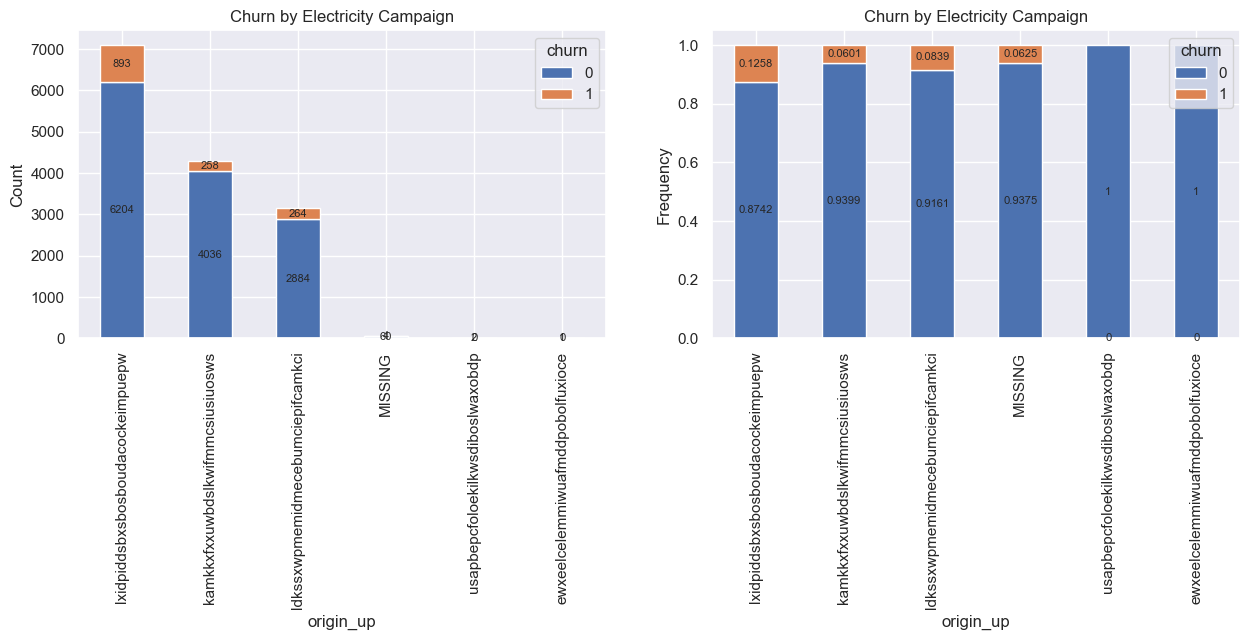

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(4)
plot_categorical(client_df, "origin_up", ax=axes[0], title="Churn by Electricity Campaign", ylabel="Count")
plot_categorical(client_df, "origin_up", normalize=True, ax=axes[1], title="Churn by Electricity Campaign", ylabel="Frequency")

### Consumption

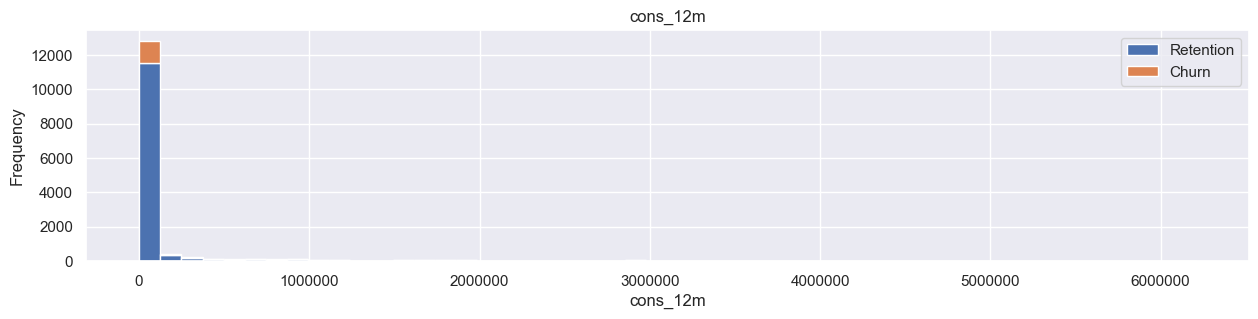

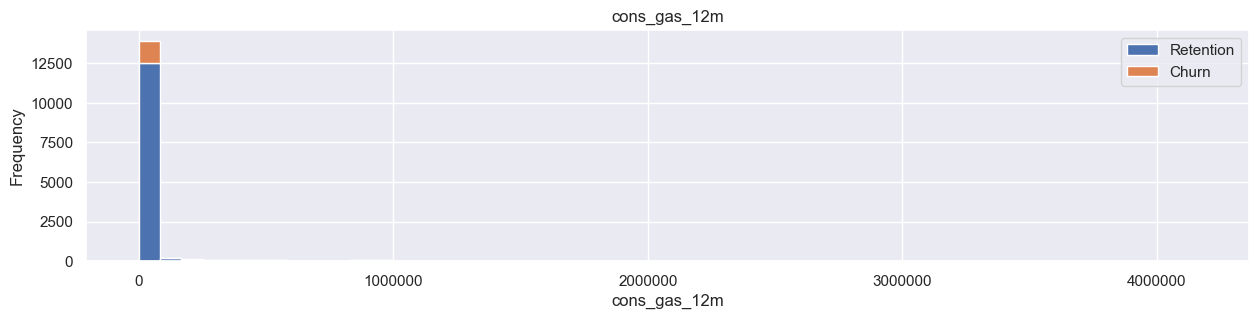

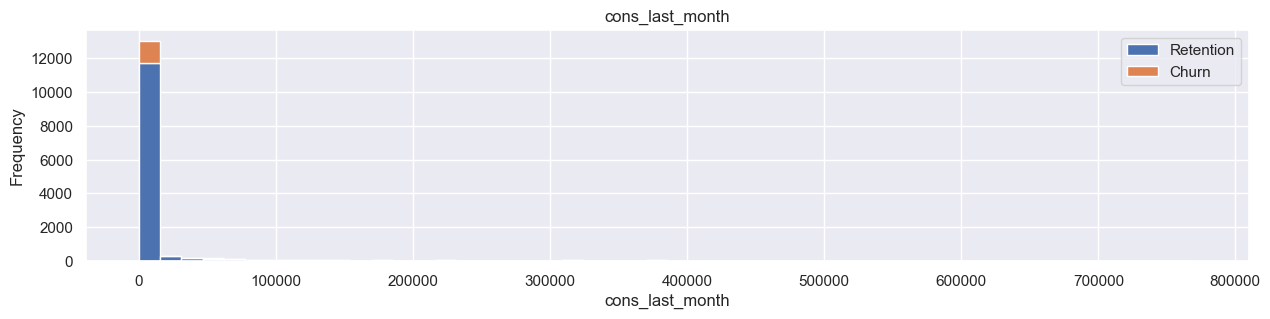

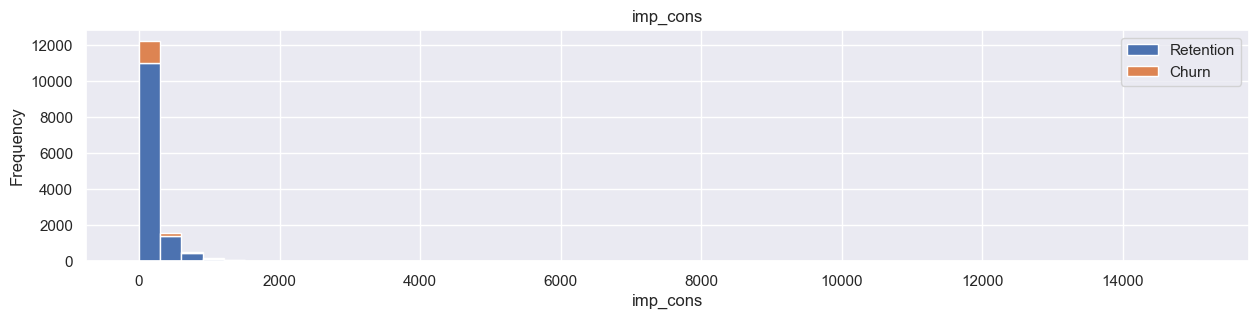

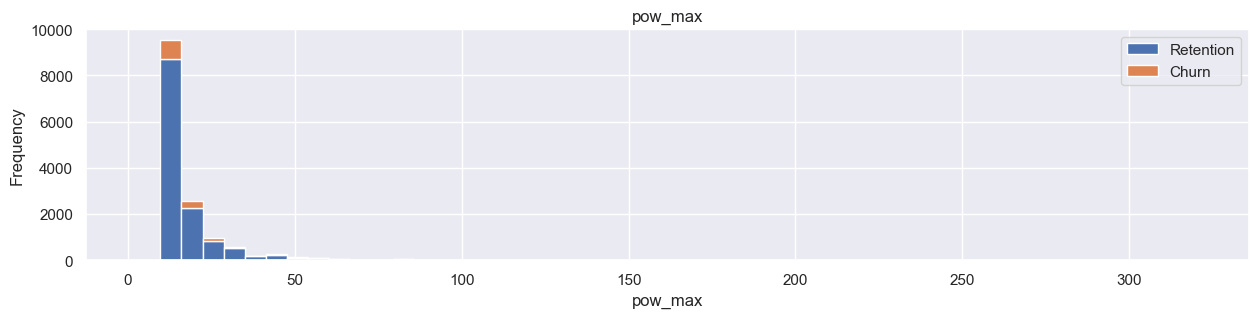

In [19]:
consumption_cols = ["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "pow_max"]
for n, col in enumerate(consumption_cols):
    consumption_df = client_df[["id", col, "churn"]]
    fig, axs = plt.subplots(nrows=1, figsize=(15, 3))
    plt.title(col)
    plot_distribution(consumption_df, col, axs)

- Churn appears to be relatively higher for customers who consume less. 
- Very skewed distributions

### Tenure

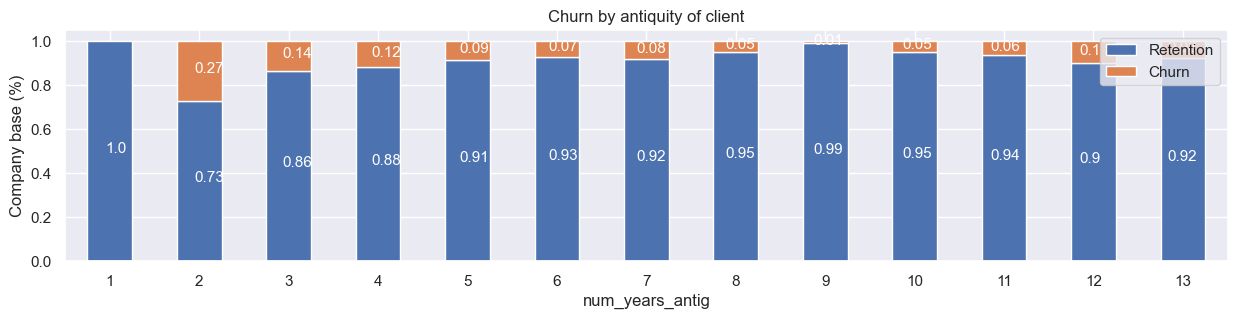

In [20]:
df_tmp = client_df[["num_years_antig", "churn"]].copy()
df_tmp = 1 - df_tmp.groupby("num_years_antig").mean(numeric_only=True)
df_tmp["retention"] = 1 - df_tmp["churn"]
plot_stacked_bars(df_tmp, "Churn by antiquity of client", (15, 3))

- It seems that for very old and very new contracts, customers are more likely to churn, expect for contracts
signed in 2014
- Non-linear relationship between first contract date and churn

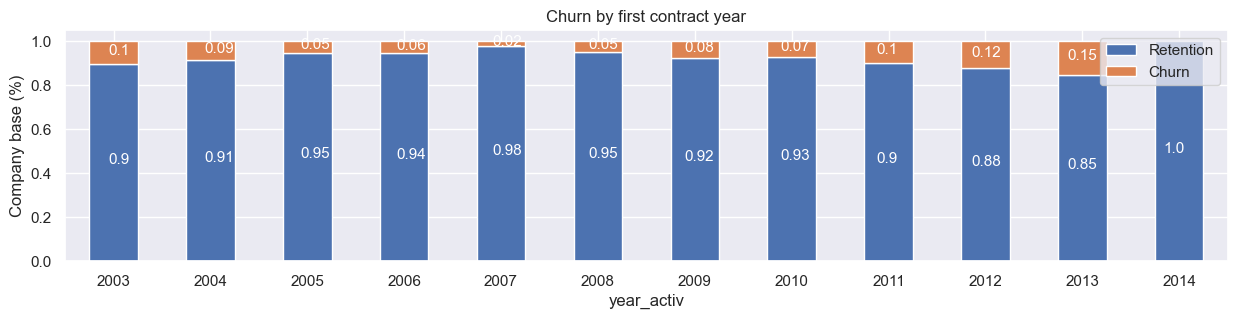

In [21]:
df_tmp = client_df[["date_activ", "churn"]].copy()
df_tmp["year_activ"] = df_tmp["date_activ"].dt.year
df_tmp = 1 - df_tmp.groupby("year_activ").mean(numeric_only=True)
df_tmp["retention"] = 1 - df_tmp["churn"]
plot_stacked_bars(df_tmp, "Churn by first contract year", (15, 3))

- Same results as using the client's antiquity

### Forecasts

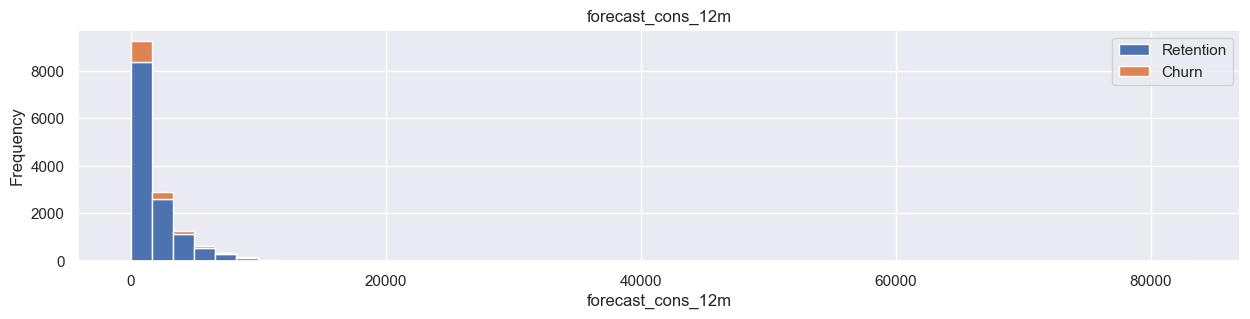

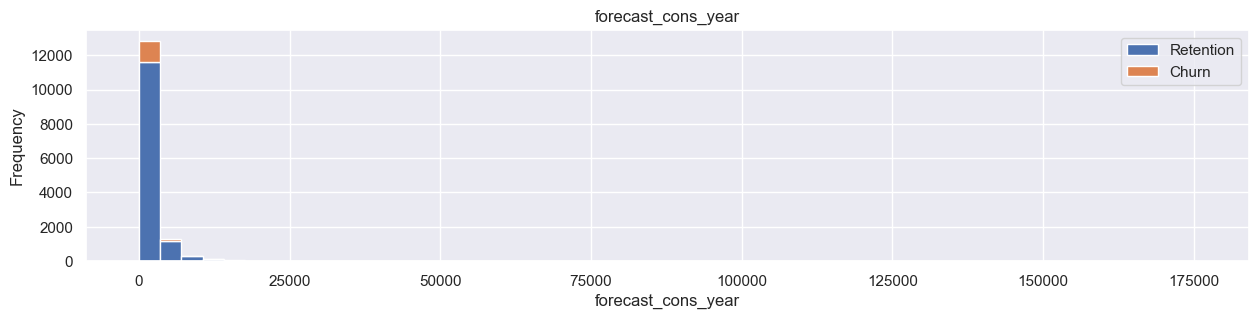

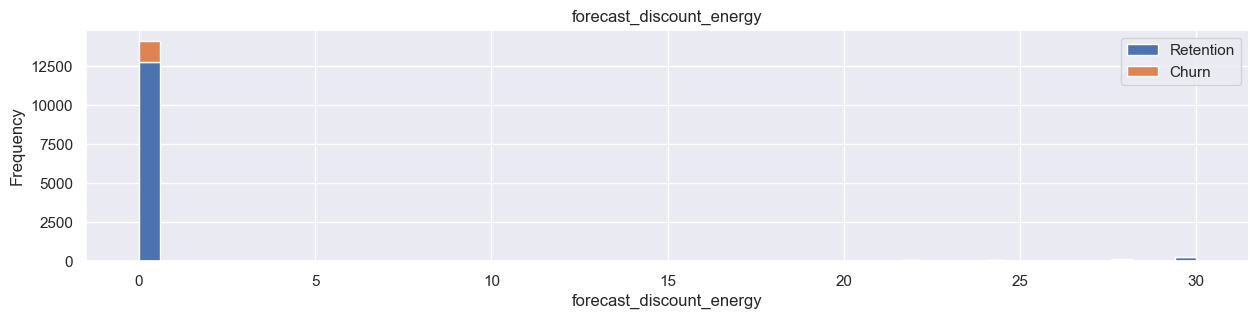

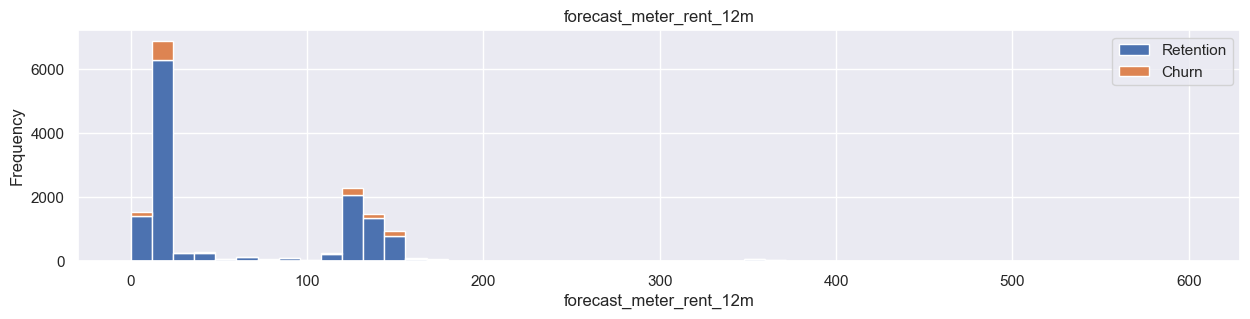

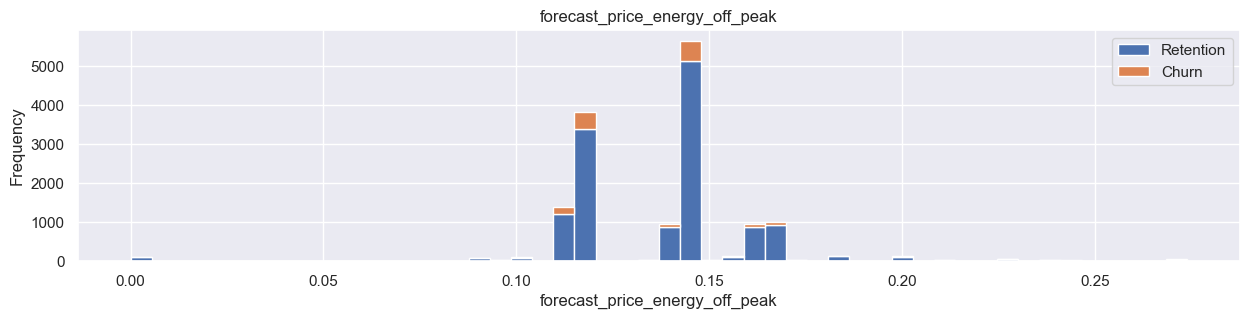

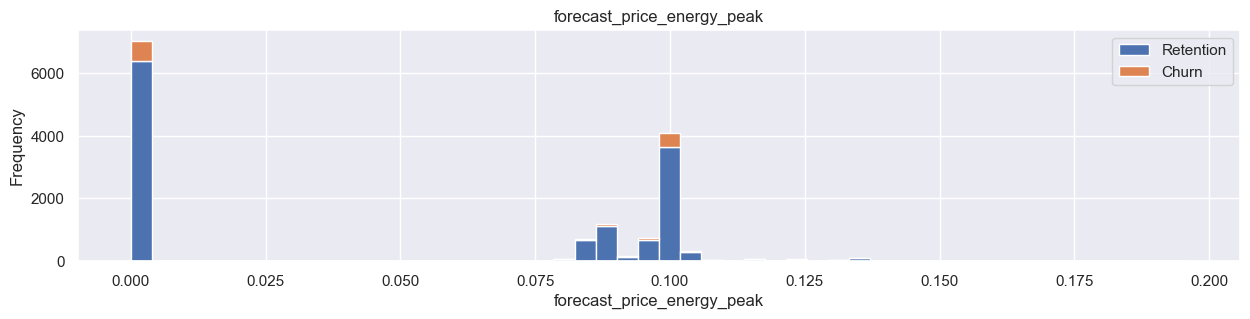

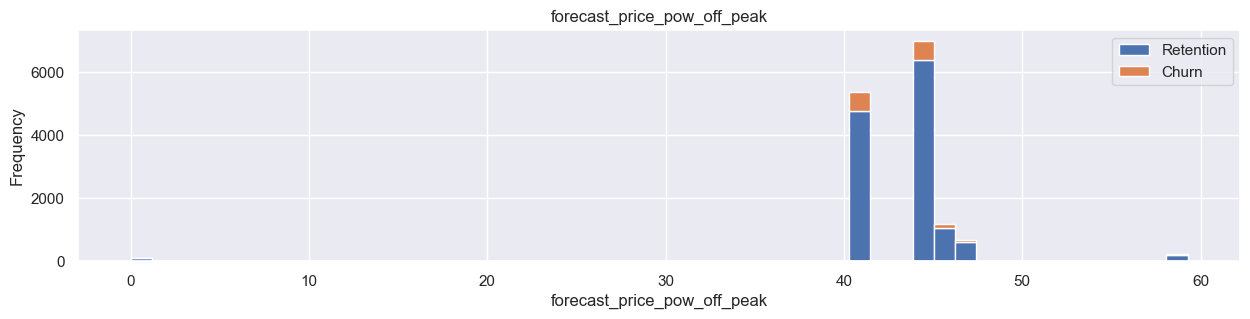

In [22]:
forecast_cols = ["forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy", "forecast_meter_rent_12m", 
                 "forecast_price_energy_off_peak", "forecast_price_energy_peak", "forecast_price_pow_off_peak"]
for n, col in enumerate(forecast_cols):
    forecast_df = client_df[["id", col, "churn"]]
    fig, axs = plt.subplots(nrows=1, figsize=(15, 3))
    plt.title(col)
    plot_distribution(forecast_df, col, axs)

- Skewed distributions for consumption
- Predicted discount is zero for almost all customers
- Predicted peak price is zero for almost all customers

### Margins

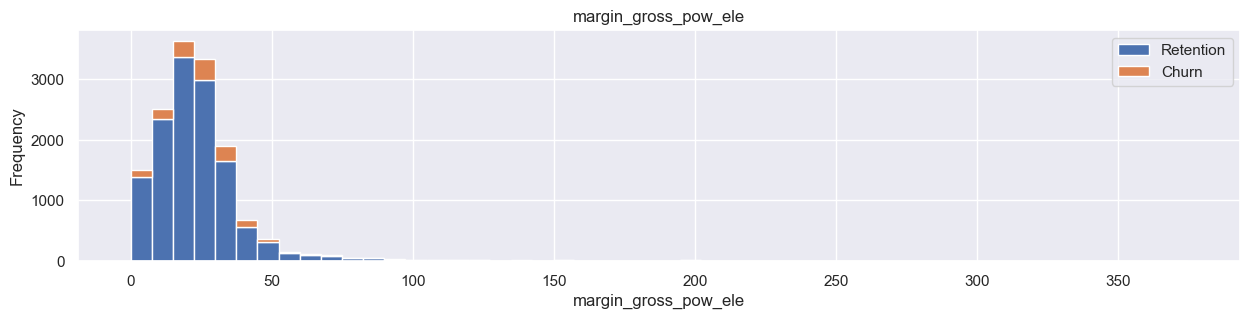

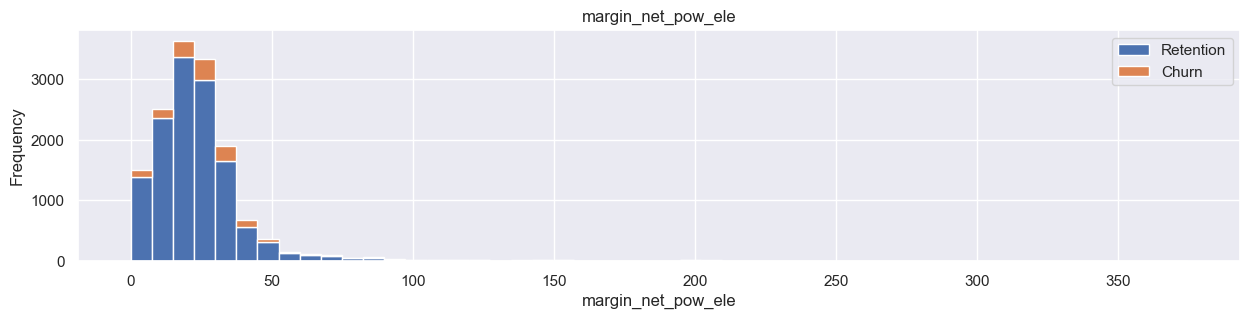

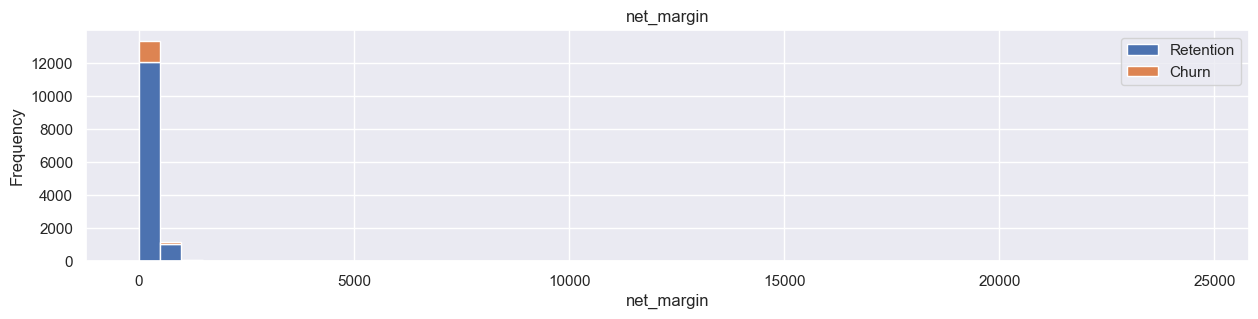

In [23]:
margin_cols = ["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]
for n, col in enumerate(margin_cols):
    margins_df = client_df[["id", col, "churn"]]
    fig, axs = plt.subplots(nrows=1, figsize=(15, 3))
    plt.title(col)
    plot_distribution(margins_df, col, axs)

### Number of active products

In [24]:
client_df[["nb_prod_act"]].value_counts()

nb_prod_act
1              11431
2               2445
3                523
4                150
5                 31
9                 11
6                  8
8                  4
10                 2
32                 1
Name: count, dtype: int64

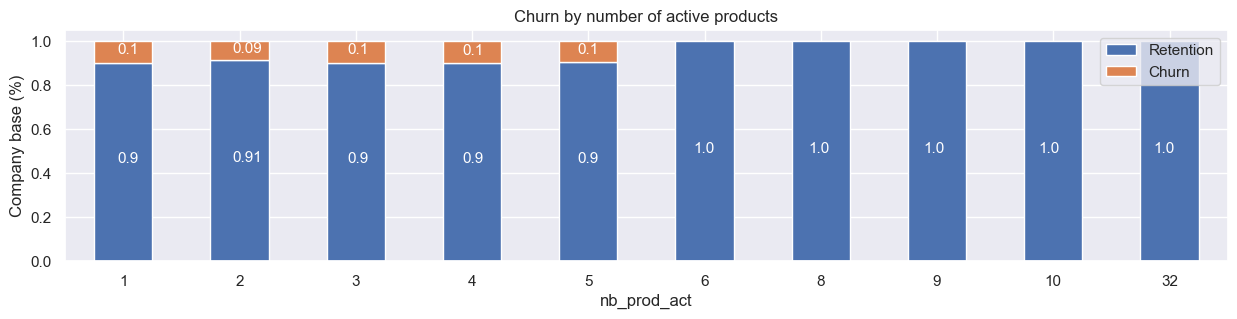

In [25]:
df_tmp = client_df[["nb_prod_act", "churn"]].copy()
df_tmp = 1 - df_tmp.groupby("nb_prod_act").mean(numeric_only=True)
df_tmp["retention"] = 1 - df_tmp["churn"]
plot_stacked_bars(df_tmp, "Churn by number of active products", (15, 3))

- Intuitively, the more active products a customer has, the more effort it takes to switch providers.
- However, may not be meaningful due to very few samples for > 5 active products.

### Correlations

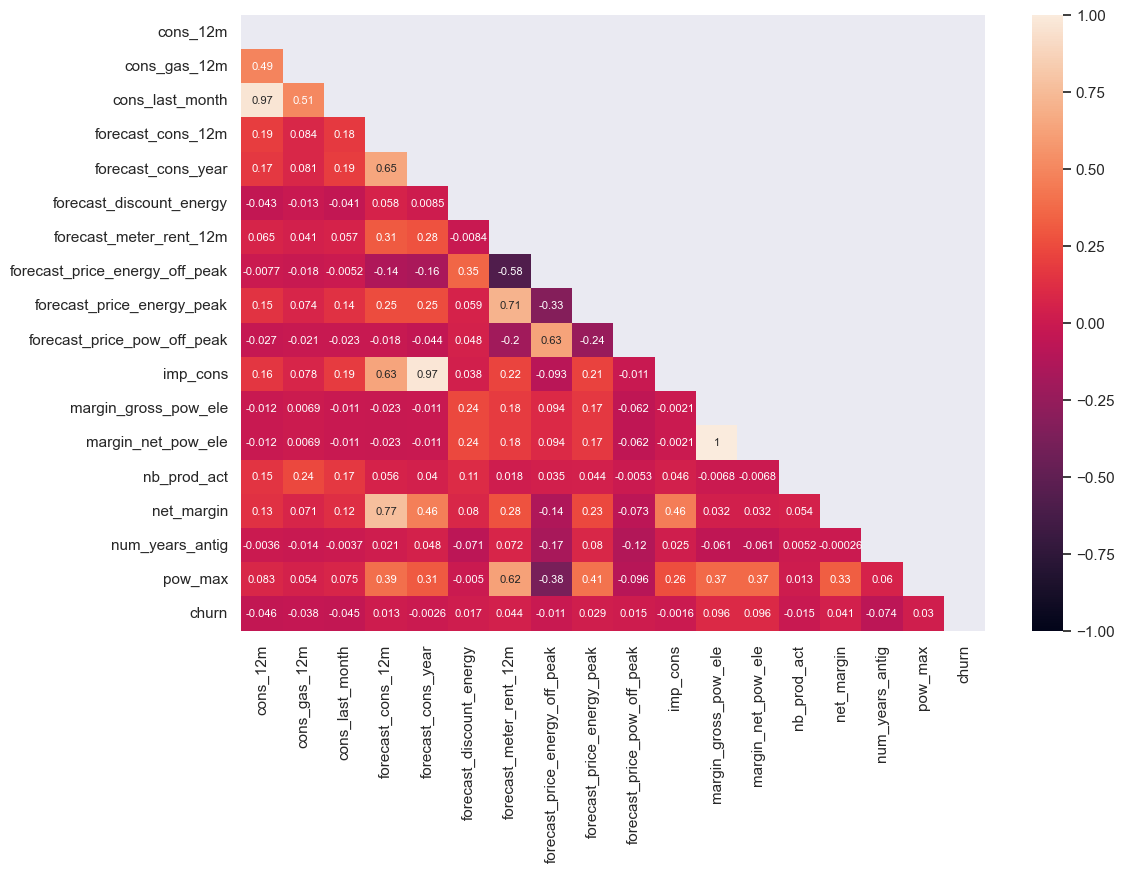

In [26]:
plt.figure(figsize=(12, 8))
corr_matrix = client_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8}, vmin=-1, vmax=1, mask=np.triu(corr_matrix))
plt.show()

- There does not appear to be a strong LINEAR relation between numeric attributes and churn
- As analyzed before there might be a non-linear relation e.g., for consumption
- Some attributes are strongly correlated with each other (multicollinearity)
- Correlation of categorical attributes must be checked after feature engineering and transformation to numeric features

## Price data

In [27]:
print(price_df["price_date"].unique())
print(price_df.groupby("id")["price_date"].count().value_counts())

<DatetimeArray>
['2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00',
 '2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00',
 '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00',
 '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00']
Length: 12, dtype: datetime64[ns]
price_date
12    15990
11       83
10       11
9         6
7         3
8         3
Name: count, dtype: int64


- For most clients we have monthly prices from 2015-01-01 to 2015-12-01

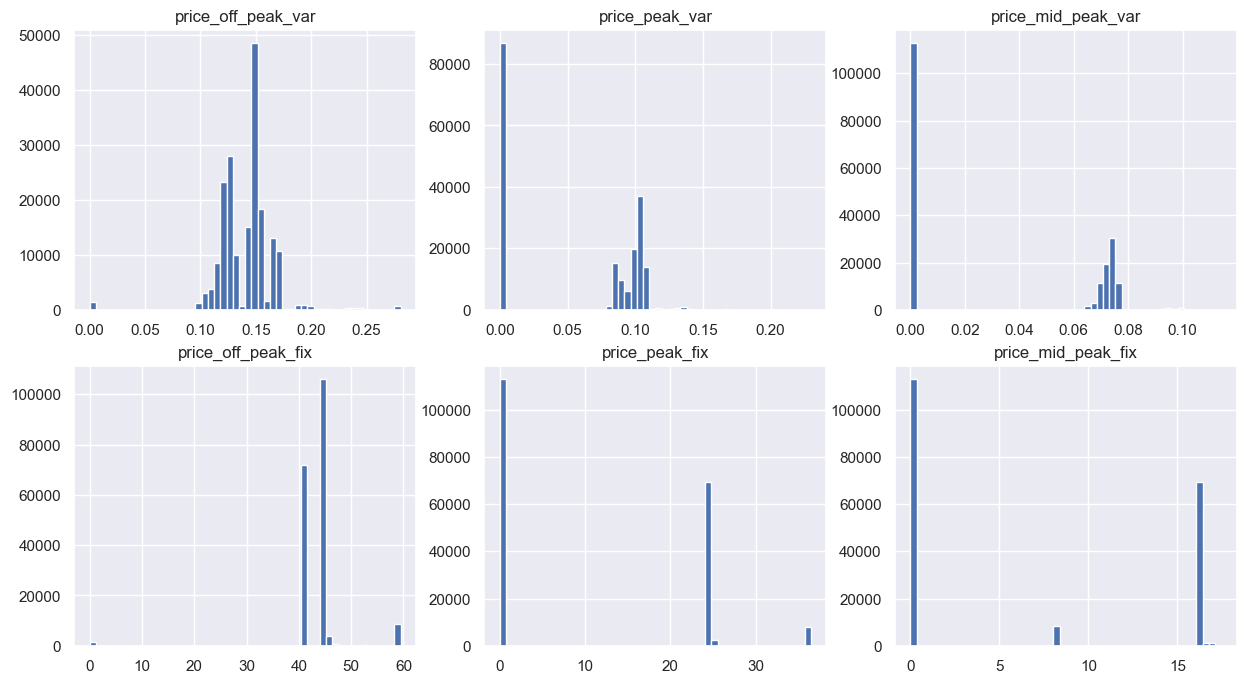

In [28]:
# distributions of price attributes
price_cols = ["price_off_peak_var", "price_peak_var", "price_mid_peak_var", "price_off_peak_fix", "price_peak_fix", "price_mid_peak_fix"]

plt.figure(figsize=(15, 8))
for n, col in enumerate(price_cols):
    plt.subplot(2, 3, n+1)
    plt.title(col)
    plt.hist(price_df[col], bins=50)
plt.show()

- Most values for peak and mid prices are 0, should be discussed with the client why this is the case
- For further analysis only fix and variable off peak prices are useful

### Price Sensitivity

- In economics price sensitivity is usually calculated as change in consumption divided by change in price, however we have no
time series data of consumption available
- Ideas for variables to model price sensitivity:
    - Mean price
    - Price volatility
    - Absolute price change between 2015-01-01 and 2015-12-01
    - Relative price change between 2015-01-01 and 2015-12-01
    - Dummy variable which is 1 if price increases, otherwise 0

In [29]:
# drop all rows with prices which are 0
price_df = price_df[(price_df["price_off_peak_var"] != 0) & (price_df["price_off_peak_fix"] != 0)]

In [30]:
# mean price in 2015
price_mean = price_df[["id", "price_off_peak_var", "price_off_peak_fix"]].groupby("id").mean().reset_index()
price_mean = price_mean.rename(columns={"price_off_peak_var": "price_var_mean", "price_off_peak_fix": "price_fix_mean"})

In [31]:
# price volatility (standard deviation) in 2015
price_std = price_df[["id", "price_off_peak_var", "price_off_peak_fix"]].groupby("id").std().reset_index()
price_std = price_std.rename(columns={"price_off_peak_var": "price_var_std", "price_off_peak_fix": "price_fix_std"})

In [32]:
grouped_df = price_df[["id", "price_date", "price_off_peak_var", "price_off_peak_fix"]].groupby("id")

# absolute price change in 2015
price_chg_abs = grouped_df.apply(lambda group: group.sort_values("price_date")[["price_off_peak_var", "price_off_peak_fix"]].diff(11).dropna())
price_chg_abs = price_chg_abs.reset_index(level=0)
price_chg_abs = price_chg_abs.rename(columns={"price_off_peak_var": "price_var_abs_chg", "price_off_peak_fix": "price_fix_abs_chg"})

In [33]:
# price change in percent in 2015
price_chg_rel = grouped_df.apply(lambda group: group.sort_values("price_date")[["price_off_peak_var", "price_off_peak_fix"]].pct_change(11).dropna())
price_chg_rel = price_chg_rel.reset_index(level=0)
price_chg_rel = price_chg_rel.rename(columns={"price_off_peak_var": "price_var_rel_chg", "price_off_peak_fix": "price_fix_rel_chg"})

In [34]:
# 1 if price increase, 0 else
price_increase = price_chg_abs.copy()
price_increase[["price_var_abs_chg", "price_fix_abs_chg"]] = (price_increase[["price_var_abs_chg", "price_fix_abs_chg"]] > 0).astype(int)
price_increase = price_increase.rename(columns={"price_var_abs_chg": "price_var_increase", "price_fix_abs_chg": "price_fix_increase"})

In [35]:
# merge price data
df_merged = price_mean.merge(price_std).merge(price_chg_abs).merge(price_chg_rel).merge(price_increase).merge(client_df[["id", "churn"]])

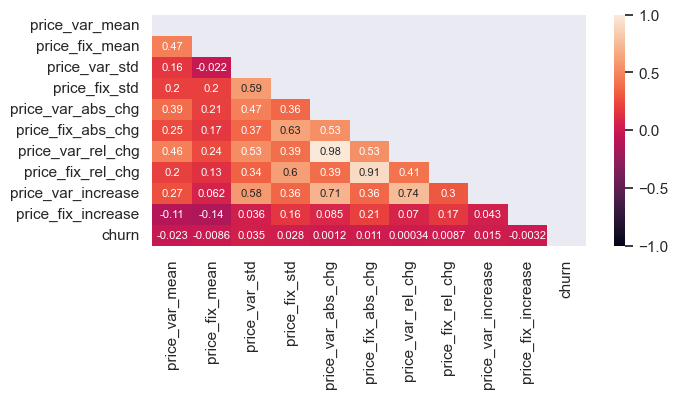

In [36]:
plt.figure(figsize=(7, 3))
corr_matrix = df_merged.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8}, vmin=-1, vmax=1, mask=np.triu(corr_matrix))
plt.show()

- Almost no correlation between price data and churn
- Price data does not seem to be a particularly strong predictor of churn
- Some price variables are highly correlated with each other e.g., relative change with absolute change, which makes sense

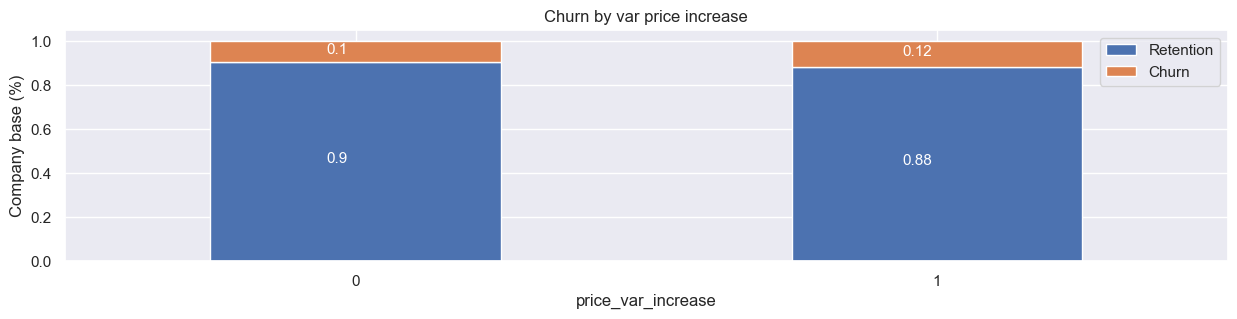

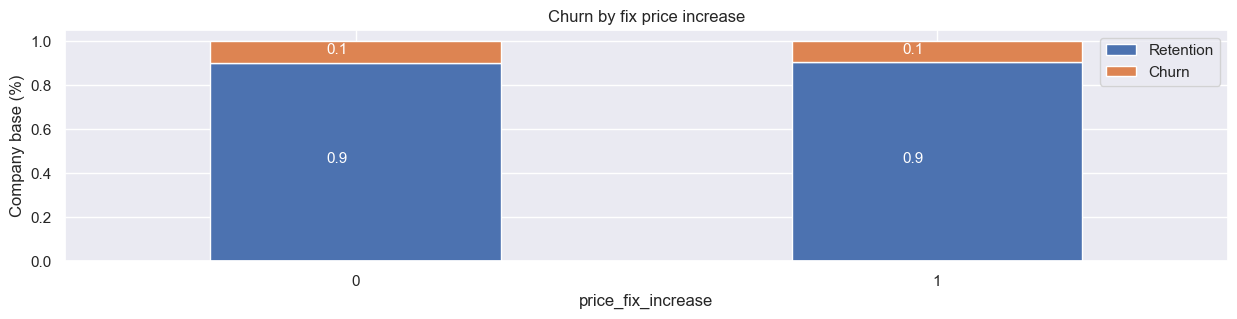

In [37]:
df_tmp = df_merged[["price_var_increase", "churn"]].copy()
df_tmp = 1 - df_tmp.groupby("price_var_increase").mean(numeric_only=True)
df_tmp["retention"] = 1 - df_tmp["churn"]
plot_stacked_bars(df_tmp, "Churn by var price increase", (15, 3))

df_tmp = df_merged[["price_fix_increase", "churn"]].copy()
df_tmp = 1 - df_tmp.groupby("price_fix_increase").mean(numeric_only=True)
df_tmp["retention"] = 1 - df_tmp["churn"]
plot_stacked_bars(df_tmp, "Churn by fix price increase", (15, 3))

- As already seen in the correlation matrix clients are somewhat more likely to churn if there is a price increase in the variable price
- Does not hold for a fix price increase